In [ ]:
import pandas as pd
df=pd.read_csv("cleaned_power_consumption.csv")
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Hour,Day,...,Month,IsWeekend,Lag_1,Lag_24,RollingMean_6,RollingMean_24,Device_Total_Consumption,Device_Avg_Consumption,Device_Max_Consumption,Device_Min_Consumption
0,4.474,0.0,234.96,19.4,0.0,0.0,17.0,2006-12-16 17:48:00,17,16,...,12,1,5.174,4.216,5.667000,4.574917,17.0,5.666667,17.0,0.0
1,3.248,0.0,236.66,13.6,0.0,0.0,17.0,2006-12-16 17:49:00,17,16,...,12,1,4.474,5.360,5.587000,4.486917,17.0,5.666667,17.0,0.0
2,3.236,0.0,235.84,13.6,0.0,0.0,17.0,2006-12-16 17:50:00,17,16,...,12,1,3.248,5.374,5.144000,4.397833,17.0,5.666667,17.0,0.0
3,3.228,0.0,235.60,13.6,0.0,0.0,17.0,2006-12-16 17:51:00,17,16,...,12,1,3.236,5.388,4.397667,4.307833,17.0,5.666667,17.0,0.0
4,3.258,0.0,235.49,13.8,0.0,0.0,17.0,2006-12-16 17:52:00,17,16,...,12,1,3.228,3.666,3.769667,4.290833,17.0,5.666667,17.0,0.0


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')

In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Hour', 'Day', 'DayOfWeek', 'Month',
       'IsWeekend', 'Lag_1', 'Lag_24', 'RollingMean_6', 'RollingMean_24',
       'Device_Total_Consumption', 'Device_Avg_Consumption',
       'Device_Max_Consumption', 'Device_Min_Consumption'],
      dtype='object')

In [ ]:
y=df['Global_active_power']

In [ ]:
X = df[['Hour', 'Day', 'DayOfWeek', 'Month',
        'IsWeekend',
        'Lag_1', 'Lag_24',
        'RollingMean_6', 'RollingMean_24']]

In [ ]:
from sklearn.linear_model import LinearRegression

split = int(len(df)*0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Week'] = df['Datetime'].dt.isocalendar().week
df['DayOfWeek'] = df['Datetime'].dt.day_name()

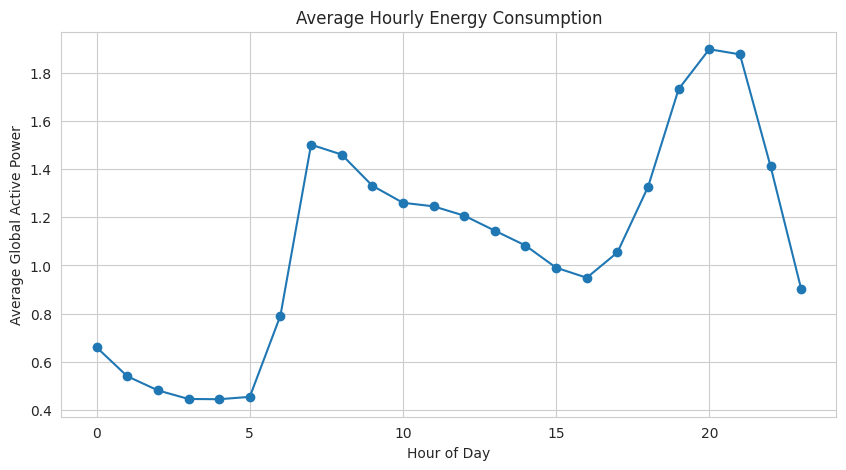

In [ ]:
hourly_avg = df.groupby('Hour')['Global_active_power'].mean()

plt.figure(figsize=(10,5))
hourly_avg.plot(marker='o')
plt.title("Average Hourly Energy Consumption")
plt.xlabel("Hour of Day")
plt.ylabel("Average Global Active Power")
plt.grid(True)
plt.show()

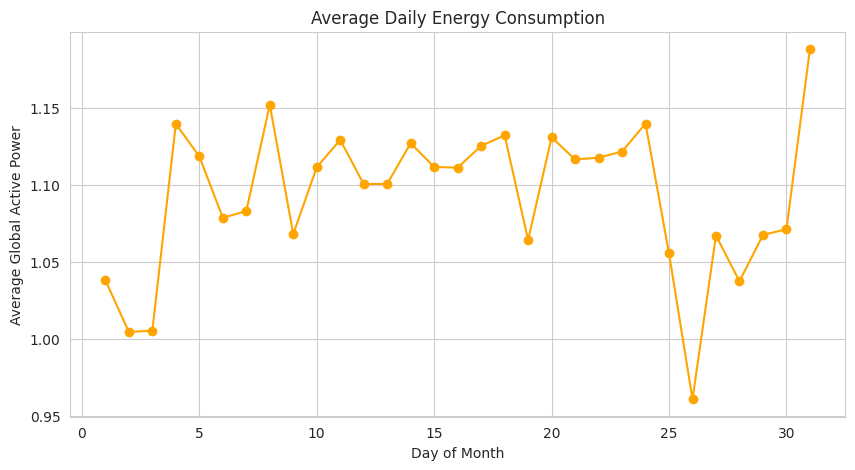

In [ ]:
daily_avg = df.groupby('Day')['Global_active_power'].mean()

plt.figure(figsize=(10,5))
daily_avg.plot(marker='o', color='orange')
plt.title("Average Daily Energy Consumption")
plt.xlabel("Day of Month")
plt.ylabel("Average Global Active Power")
plt.grid(True)
plt.show()

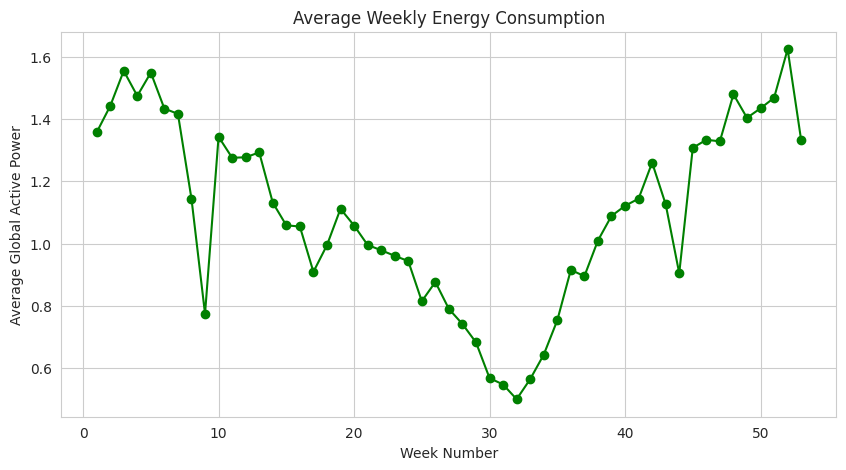

In [ ]:
weekly_avg = df.groupby('Week')['Global_active_power'].mean()

plt.figure(figsize=(10,5))
weekly_avg.plot(marker='o', color='green')
plt.title("Average Weekly Energy Consumption")
plt.xlabel("Week Number")
plt.ylabel("Average Global Active Power")
plt.grid(True)
plt.show()

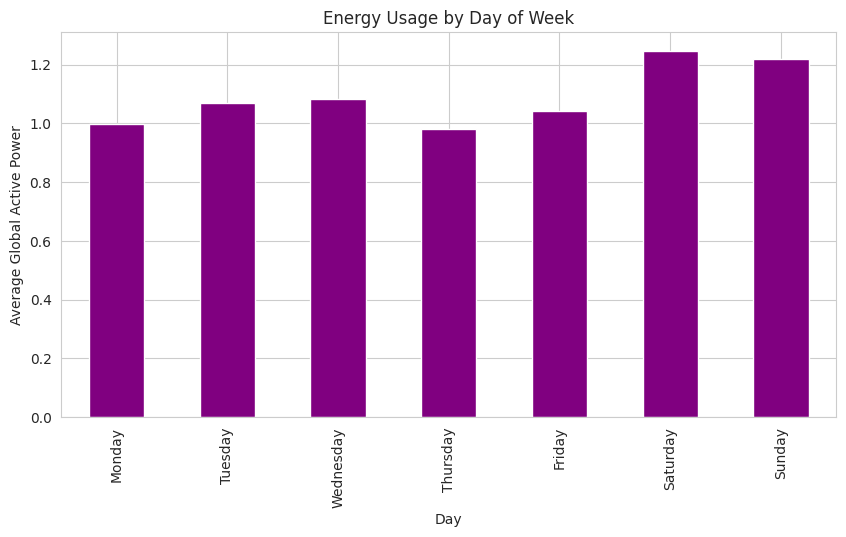

In [ ]:
dow_avg = df.groupby('DayOfWeek')['Global_active_power'].mean()
dow_avg = dow_avg.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(10,5))
dow_avg.plot(kind='bar', color='purple')
plt.title("Energy Usage by Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Global Active Power")
plt.show()

In [ ]:
peak_hour = hourly_avg.idxmax()
peak_value = hourly_avg.max()

print("Peak Usage Hour:", peak_hour)
print("Highest Average Consumption:", peak_value)

Peak Usage Hour: 20
Highest Average Consumption: 1.899064135957484


In [ ]:
def energy_suggestions(df):
    suggestions = []

    peak_hour = df.groupby('Hour')['Global_active_power'].mean().idxmax()

    if peak_hour in range(18, 23):
        suggestions.append("High consumption in evening (6PM–10PM). Reduce AC/heater usage.")

    if df['IsWeekend'].mean() > 0.5:
        suggestions.append("Weekend usage is high. Limit heavy appliances usage.")

    if df['Global_active_power'].mean() > 1.5:
        suggestions.append("Overall consumption is high. Consider energy-efficient appliances.")

    return suggestions

tips = energy_suggestions(df)

print("Smart Energy Saving Suggestions:")
for tip in tips:
    print("-", tip)

Smart Energy Saving Suggestions:
- High consumption in evening (6PM–10PM). Reduce AC/heater usage.


In [ ]:
print("===== DASHBOARD SUMMARY =====")
print("Average Consumption:", round(df['Global_active_power'].mean(),2))
print("Maximum Consumption:", df['Global_active_power'].max())
print("Minimum Consumption:", df['Global_active_power'].min())
print("Peak Hour:", peak_hour)

===== DASHBOARD SUMMARY =====
Average Consumption: 1.09
Maximum Consumption: 11.122
Minimum Consumption: 0.076
Peak Hour: 20


In [ ]:
from google.colab import files
import pandas as pd

# Upload your CSV file
uploaded = files.upload()
# Make sure you select 'cleaned_power_consumption.csv'

# Read the dataset
df = pd.read_csv("cleaned_power_consumption.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Week'] = df['Datetime'].dt.isocalendar().week
df['DayOfWeek'] = df['Datetime'].dt.day_name()
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday','Sunday']).astype(int)

print("Dataset loaded successfully! ✅")
df.head()

Saving cleaned_power_consumption.csv to cleaned_power_consumption (1).csv
Dataset loaded successfully! ✅


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Hour,Day,...,IsWeekend,Lag_1,Lag_24,RollingMean_6,RollingMean_24,Device_Total_Consumption,Device_Avg_Consumption,Device_Max_Consumption,Device_Min_Consumption,Week
0,4.474,0.0,234.96,19.4,0.0,0.0,17.0,2006-12-16 17:48:00,17,16,...,1,5.174,4.216,5.667000,4.574917,17.0,5.666667,17.0,0.0,50
1,3.248,0.0,236.66,13.6,0.0,0.0,17.0,2006-12-16 17:49:00,17,16,...,1,4.474,5.360,5.587000,4.486917,17.0,5.666667,17.0,0.0,50
2,3.236,0.0,235.84,13.6,0.0,0.0,17.0,2006-12-16 17:50:00,17,16,...,1,3.248,5.374,5.144000,4.397833,17.0,5.666667,17.0,0.0,50
3,3.228,0.0,235.60,13.6,0.0,0.0,17.0,2006-12-16 17:51:00,17,16,...,1,3.236,5.388,4.397667,4.307833,17.0,5.666667,17.0,0.0,50
4,3.258,0.0,235.49,13.8,0.0,0.0,17.0,2006-12-16 17:52:00,17,16,...,1,3.228,3.666,3.769667,4.290833,17.0,5.666667,17.0,0.0,50


In [ ]:
!pip install flask pyngrok

In [ ]:

!ngrok authtoken 39ks7HipobRDk6hPKeGqEbw1SRz_6Z5UcdckSk8864yYxresT

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, render_template_string, request
from pyngrok import ngrok
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import base64
from io import BytesIO

app = Flask(__name__)

# -----------------------------
# LOAD DATA
# -----------------------------
df = pd.read_csv('cleaned_power_consumption.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=True)
df.set_index('Datetime', inplace=True)

device_cols = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']

for col in device_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(method='ffill', inplace=True)


def plot_to_base64(fig):
    buffer = BytesIO()
    fig.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image = base64.b64encode(buffer.getvalue()).decode('utf-8')
    buffer.close()
    return image

def simple_forecast(series, steps=7):
    last_value = series.iloc[-1]
    trend = series.diff().mean()
    return [last_value + trend*i for i in range(1, steps+1)]

def generate_alerts(grouped):

    alerts = []
    suggestions = []

    avg_usage = grouped.mean().mean()

    if avg_usage > 20000:
        alerts.append("⚠️ High energy usage detected!")
        suggestions.append("Reduce usage of high-power appliances during peak hours.")

    highest_device = grouped.mean().idxmax()
    suggestions.append(f"Highest consumption from {highest_device}. Consider optimizing it.")

    return alerts, suggestions
@app.route('/', methods=['GET','POST'])
def index():

    period = request.form.get("period", "Daily")

    if period == "Daily":
        grouped = df[device_cols].resample('D').sum()
    elif period == "Weekly":
        grouped = df[device_cols].resample('W').sum()
    elif period == "Yearly":
        grouped = df[device_cols].resample('Y').sum()
    grouped = grouped.tail(60)
    fig1, ax1 = plt.subplots(figsize=(15,5))
    grouped.plot(ax=ax1, linewidth=2)

    ax1.set_title(f"{period} Device Consumption", fontsize=15)
    ax1.set_xlabel("Time", fontsize=12)
    ax1.set_ylabel("Energy (Wh)", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    device_graph = plot_to_base64(fig1)
    plt.close(fig1)

    total_series = grouped.sum(axis=1)
    forecast_values = simple_forecast(total_series, 7)

    fig2, ax2 = plt.subplots(figsize=(15,5))

    ax2.plot(total_series.values, linewidth=2, label="Actual")
    ax2.plot(range(len(total_series), len(total_series)+7),
             forecast_values, linestyle='--', linewidth=2, label="Predicted")

    ax2.set_title("Future Energy Prediction (Next 7 Periods)", fontsize=15)
    ax2.set_xlabel("Time", fontsize=12)
    ax2.set_ylabel("Energy (Wh)", fontsize=12)
    ax2.legend()

    plt.tight_layout()

    prediction_graph = plot_to_base64(fig2)
    plt.close(fig2)
    alerts, suggestions = generate_alerts(grouped)

    html = f"""
    <h1 style='text-align:center;'>Smart Energy Dashboard</h1>

    <form method="POST" style="margin-bottom:20px;">
        <label>Select Period:</label>
        <select name="period">
            <option value="Daily">Daily</option>
            <option value="Weekly">Weekly</option>
            <option value="Yearly">Yearly</option>
        </select>
        <button type="submit">Show</button>
    </form>

    <h2>📊 Device Consumption</h2>
    <img src="data:image/png;base64,{device_graph}" />

    <h2>🔮 Future Prediction</h2>
    <img src="data:image/png;base64,{prediction_graph}" />

    <h2>⚠️ Alerts</h2>
    <ul>
    {''.join(f'<li style="color:red;">{a}</li>' for a in alerts) if alerts else '<li>No Alerts</li>'}
    </ul>

    <h2>💡 Recommendations</h2>
    <ul>
    {''.join(f'<li>{s}</li>' for s in suggestions)}
    </ul>
    """

    return render_template_string(html)

public_url = ngrok.connect(5000)
print("Public URL:", public_url)

app.run(port=5000)

/tmp/ipython-input-3333997782.py:16: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=True)
/tmp/ipython-input-3333997782.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Public URL: NgrokTunnel: "https://aubrey-transcriptional-enumerably.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [19/Feb/2026 14:13:47] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Feb/2026 14:13:51] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [19/Feb/2026 14:16:48] "GET / HTTP/1.1" 200 -
